<a href="https://colab.research.google.com/github/yashkarale06/Amazon-Reviews-Sentiment-Analysis.ipynb/blob/main/Amazon_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Movies_and_TV_5.json.gz

--2023-12-04 16:34:41--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Movies_and_TV_5.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791322468 (755M) [application/x-gzip]
Saving to: ‘Movies_and_TV_5.json.gz’

Movies_and_TV_5.jso 100%[===================>] 754.66M  78.9MB/s    in 9.4s    

2023-12-04 16:34:51 (80.2 MB/s) - ‘Movies_and_TV_5.json.gz’ saved [791322468/791322468]



In [ ]:
import gzip
import json


json_gz_file = 'Movies_and_TV_5.json.gz'

chunk_size = 200000
data = []

with gzip.open(json_gz_file, 'rt', encoding='utf-8') as f:
    for _ in range(chunk_size):
        line = f.readline()
        if not line:
            break
        data.append(json.loads(line.strip()))

print(len(data))
print(data[0])


200000
{'overall': 5.0, 'verified': True, 'reviewTime': '11 9, 2012', 'reviewerID': 'A2M1CU2IRZG0K9', 'asin': '0005089549', 'style': {'Format:': ' VHS Tape'}, 'reviewerName': 'Terri', 'reviewText': "So sorry I didn't purchase this years ago when it first came out!!  This is very good and entertaining!  We absolutely loved it and anticipate seeing it repeatedly.  We actually wore out the cassette years back, so we also purchased this same product on cd.  Best purchase we made out of all!  Would purchase on dvd if we could find one.", 'summary': 'Amazing!', 'unixReviewTime': 1352419200}


In [ ]:
df = pd.DataFrame.from_dict(data)
print(len(df))

200000


In [ ]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         200000 non-null  float64
 1   verified        200000 non-null  bool   
 2   reviewTime      200000 non-null  object 
 3   reviewerID      200000 non-null  object 
 4   asin            200000 non-null  object 
 5   style           195263 non-null  object 
 6   reviewerName    199995 non-null  object 
 7   reviewText      199941 non-null  object 
 8   summary         199967 non-null  object 
 9   unixReviewTime  200000 non-null  int64  
 10  vote            46829 non-null   object 
 11  image           411 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 17.0+ MB


In [ ]:
df.isnull().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style               4737
reviewerName           5
reviewText            59
summary               33
unixReviewTime         0
vote              153171
image             199589
dtype: int64

In [ ]:
df.drop(columns=['verified','reviewTime','reviewerID','asin','style','reviewerName','summary','unixReviewTime','vote','image'],inplace=True)

In [ ]:
df

,overall,reviewText
0,5.0,So sorry I didn't purchase this years ago when...
1,5.0,Believe me when I tell you that you will recei...
2,5.0,"I have seen X live many times, both in the ear..."
3,5.0,"I was so excited for this! Finally, a live co..."
4,5.0,X is one of the best punk bands ever. I don't ...
...,...,...
199995,5.0,Thank you for a quick and easy transaction. A...
199996,5.0,Excellent service! Loved the item; will buy fr...
199997,5.0,"Worked great in my player, no issue!"
199998,5.0,One of the best movies of all time.


In [ ]:
df['overall']=df['overall'].astype(int)

In [ ]:
df['overall'] = df['overall'].apply(lambda x: 1 if x > 3 else 0)

In [ ]:
df['overall'].value_counts()

1    167889
0     32111
Name: overall, dtype: int64

In [ ]:
movie_tv_stop_words = [
    "the", "and", "is", "in", "it", "to", "of", "for", "this", "that", "with", "on", "at", "by",
    "as", "but", "not", "was", "if", "are", "you", "I", "he", "she", "we", "they", "them", "our",
    "your", "his", "her", "its", "their", "from", "into", "up", "down", "out", "about", "over", "under",
    "just", "only", "really", "very", "more", "most", "so", "too", "can", "will", "would", "should",
    "could", "might", "may", "shall", "must", "now", "then", "when", "where", "how", "why",

    "movie", "film", "show", "series", "episode", "actor", "actress", "director",

]

def clean_review(review):
    if isinstance(review, str):
        clean_review = " ".join(word for word in review.split() if word.lower() not in movie_tv_stop_words)
        return clean_review
    else:
        return ""

In [ ]:
df['reviewText'] = df['reviewText'].apply(clean_review)

In [ ]:
df.head()

,overall,reviewText
0,1,sorry I didn't purchase years ago first came o...
1,1,Believe me I tell receive a blessing watching ...
2,1,"I have seen X live many times, both early days..."
3,1,"I excited this! Finally, a live concert video ..."
4,1,X one best punk bands ever. I don't even like ...


In [ ]:
all_reviews = ' '.join(df['reviewText'].dropna())

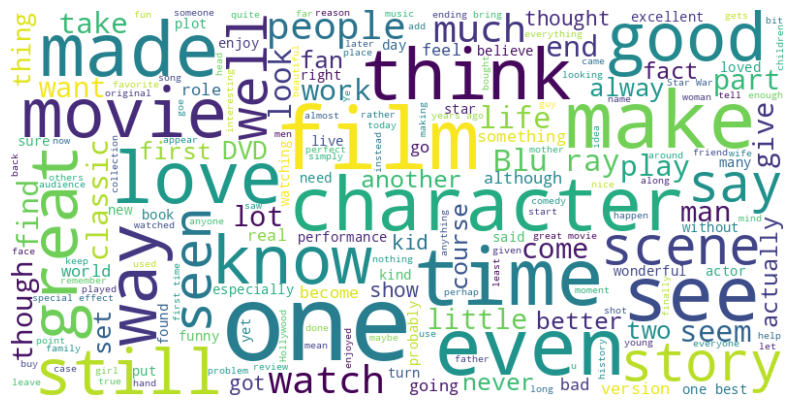

In [ ]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df['reviewText'].fillna('', inplace=True)

In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['reviewText']).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,df['overall'],test_size=0.25 ,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.88308


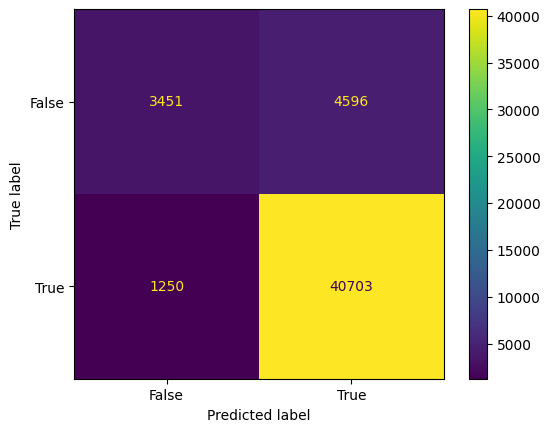

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()
